In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import style
from sklearn.linear_model import LinearRegression

style.use('seaborn-v0_8-darkgrid')

# **1.Random Ballistic Deposition**

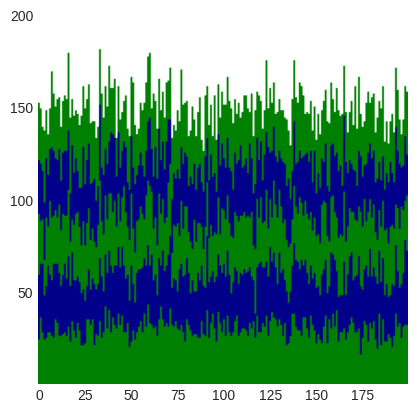

In [ ]:
#lenth of the subtrate is 200,so i will create 200*200 matrix filled with zeros,(0 representing empty space!)then i will choose one spot randomly and add 1 in that column(1 representing the particle)

mat=np.zeros(shape=(200,200),dtype=np.uint8)
h=np.zeros(shape=200,dtype=np.uint8)
r=np.random.randint(0,200,size=30000)
w=np.zeros(shape=30000,dtype=np.float16)

for i in range(30000):
  row_index=(199-h[r[i]])
  col_index=r[i]
  b = i//(200*30)

  if b%2==0:
      mat[row_index, col_index] = 1
  else:
      mat[row_index, col_index] = 2

  h[r[i]]+=1
  w[i]=np.std(h)

cmap=mcolors.ListedColormap(['white', 'green', 'darkblue'])
plt.imshow(mat,cmap=cmap)
plt.grid(visible=False)
plt.gca().set_yticks(np.arange(0, mat.shape[0], 50))
plt.gca().set_yticklabels(np.arange(mat.shape[0], 0, -50))
plt.show()


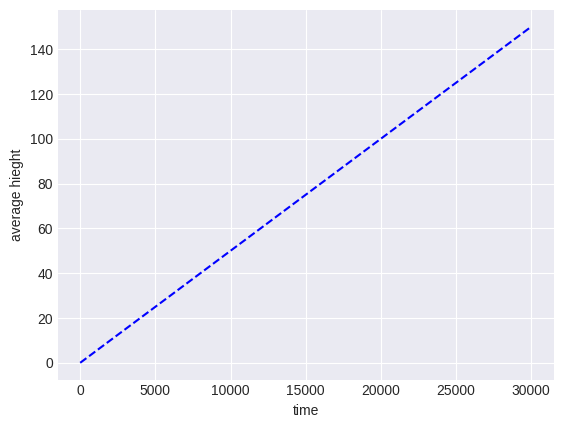

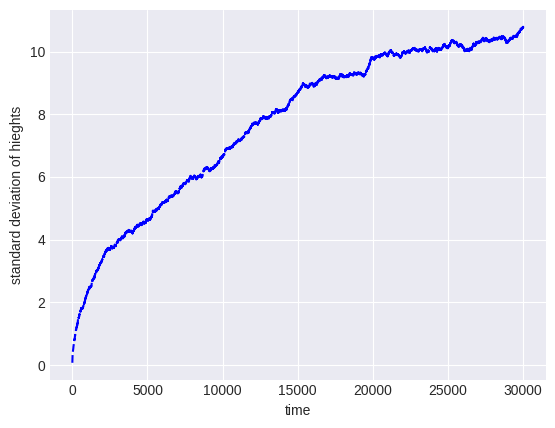

In [ ]:
'''Calculating the average height is fairly simple. At each step, one block is added to the matrix,
and there are 200 columns in total. Hence, the average height increase at each step would be +1/200.
Therefore, the average height plot is linear.'''
x=np.array([(i,(i+1)/200) for i in range(30000)])


plt.plot(x[:,0],x[:,1],linestyle='--',color='b')
plt.xlabel('time')
plt.ylabel('average hieght')
plt.show()

plt.plot(x[:,0],w,linestyle='--',color='b')
plt.xlabel('time')
plt.ylabel('standard deviation of hieghts')
plt.show()


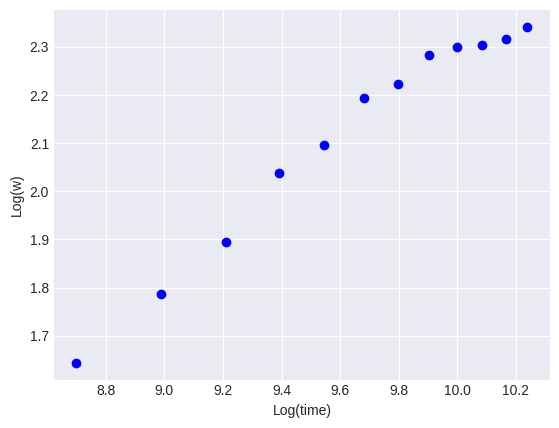

In [ ]:
#we know from theory w=t^b so log(w)=b*t,lets plot this to varify linearity
log_w=np.array([[np.log(i),np.log(w[i])] for i in range(6000,30000,2000)])#here i skip first few stds beacuse in the begining of the process they are very small and creating unwanted large values!
plt.scatter((log_w[:,0]),log_w[:,1],color='b')
plt.ylabel(ylabel='Log(w)',loc='center')
plt.xlabel(xlabel='Log(time)',loc='center')
plt.show()
#we can see that we can fit a line to this data for this i use linear regression model

[0.46877096]


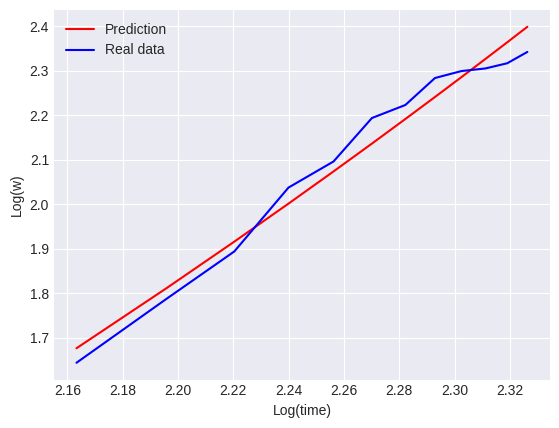

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(log_w[:,0].reshape((len(log_w),1)),log_w[:,1])
print(model.coef_)
#as we can see beta is around 0.6


predict=model.predict(log_w[:,0].reshape((len(log_w),1)))

plt.plot(np.log(log_w[:,0]),predict,color='r',label='Prediction')
plt.plot(np.log(log_w[:,0]),log_w[:,1],color='b',label='Real data')
plt.ylabel(ylabel='Log(w)',loc='center')
plt.xlabel(xlabel='Log(time)',loc='center')
plt.legend()
plt.show()

In [ ]:
#now i will run the code for 100 times to calculate 100 different betas and so calculate error!
beta=np.zeros(100)
x=np.array([np.log(i) for i in range(2000,30000)])
x=x.reshape((-1,1))

for k in range(100):
  mat=np.zeros(shape=(200,200),dtype=np.uint8)
  h=np.zeros(shape=200,dtype=np.uint8)
  r=np.random.randint(0,200,size=30000)
  w=np.zeros(shape=30000,dtype=np.float16)

  for i in range(30000):
    row_index=(199-h[r[i]])
    col_index=r[i]
    b = i//(200*30)

    if b%2==0:
        mat[row_index, col_index] = 1
    else:
        mat[row_index, col_index] = 2

    h[r[i]]+=1
    w[i]=np.std(h)

  model=LinearRegression()
  y=np.log(w[2000:])
  model.fit(x,y)
  beta[k]=model.coef_[0]



In [ ]:
beta_avg=np.mean(beta)
error=np.std(beta)
print(error)
print(beta_avg)

0.04718215875781619
0.5275509700964358


# **2.Ballistic Deposition with Relaxation**


In [ ]:
#this algorithm is quite the same as the last one,We just need to correctly implement boundry condition,the following function determine where to put the particle at each step
def WhereToFill(h,i):
  if i>0 and i<len(h):
    arr=h[i-1:i+2]
    if arr[1]==arr.min():
      return i
    else:
      x=np.random.choice(np.where(arr==arr.min())[0])
      return x+i-1

  elif i==0:
    arr=np.r_[h[-1],h[0:2]]
    if arr[1]==arr.min():
      return 0
    else:
      x=np.random.choice(np.where(arr==arr.min())[0])
      if x==0:
        return len(h)-1
      else:
        return x+i-1

  else:
    arr=np.r_[h[-2:],h[0]]
    if arr[1]==arr.min():
      return 199
    else:
      x=np.random.choice(np.where(arr==arr.min())[0])
      if x==2:
        return 0
      else:
        return x+i-1


mat=np.zeros(shape=(220,200),dtype=np.uint8)
h=np.zeros(shape=200,dtype=np.uint16)
r=np.random.randint(0,200,size=40000)
w=np.zeros(shape=40000,dtype=np.float16)
avg=np.zeros(shape=40000,dtype=np.float16)

for i in range(40000):
  fill_index=WhereToFill(h,r[i])
  row_index=(len(mat)-1-h[fill_index])
  col_index=fill_index
  b = i//(200*50)

  if b%2==0:
      mat[row_index, col_index] = 1
  else:
      mat[row_index, col_index] = 2

  h[fill_index]+=1
  w[i]=np.std(h)
  avg[i]=np.mean(h)

cmap=mcolors.ListedColormap(['white', 'green', 'darkblue'])

plt.imshow(mat,cmap=cmap)
plt.grid(visible=False)
plt.gca().set_yticks(np.arange(0, mat.shape[0], 25))
plt.gca().set_yticklabels(np.arange(mat.shape[0], 0, -25))
plt.gca().set_xticks(np.arange(0, 200, 50))
plt.gca().set_xticklabels(np.arange(200, 0, -50))
plt.show()

KeyboardInterrupt: 

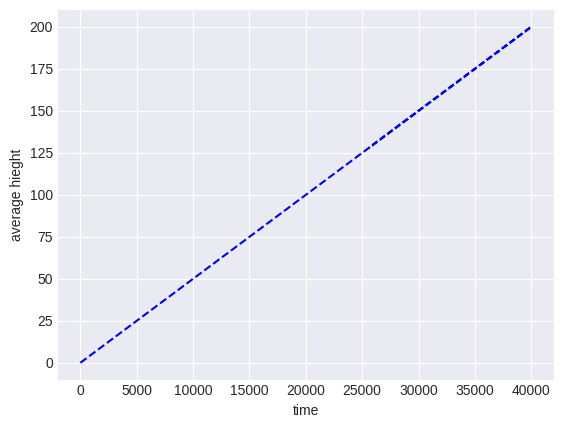

In [ ]:
x=np.arange(40000)

plt.plot(x,avg,linestyle='--',color='b')
plt.xlabel('time')
plt.ylabel('average hieght')
plt.show()

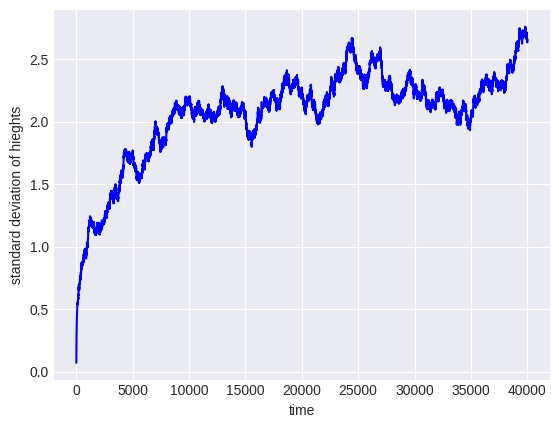

In [ ]:

plt.plot(x,w,color='b')
plt.xlabel('time')
plt.ylabel('standard deviation of hieghts')
plt.show()

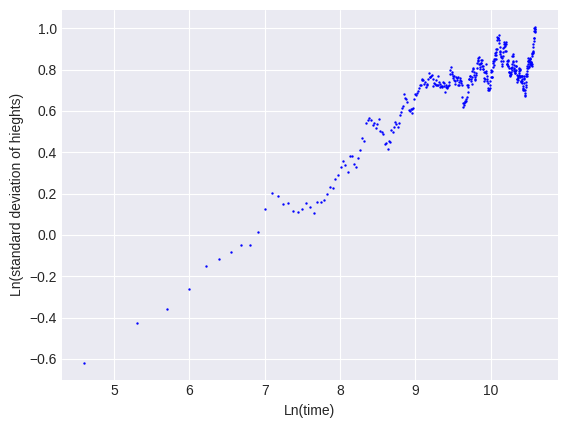

In [ ]:
plt.scatter(np.log(x[100::100]),np.log(w[100::100]),color='b',s=0.5,alpha=1)
plt.xlabel('Ln(time)')
plt.ylabel('Ln(standard deviation of hieghts)')
plt.show()

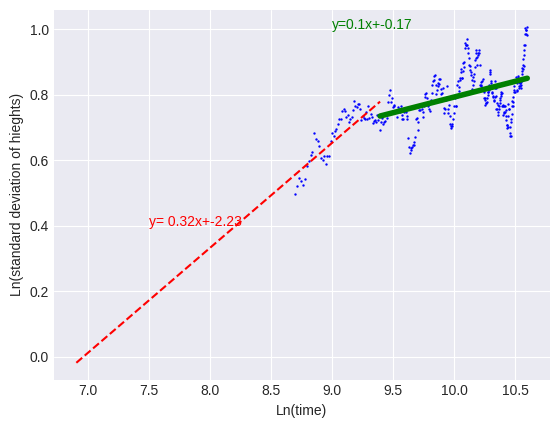

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(np.log(x[1000:12000]).reshape((-1,1)),np.log(w[1000:12000]))
linear_part=model.predict(np.log(x[1000:12000]).reshape((-1,1)))
ml=round(model.coef_[0],2)
bl=round(model.intercept_,2)

model.fit(np.log(x[12000:]).reshape((-1,1)),np.log(w[12000:]))
saturation_part=model.predict(np.log(x[12000:]).reshape((-1,1)))
ms=round(model.coef_[0],2)
bs=round(model.intercept_,2)

plt.plot(np.log(x[1000:12000]),linear_part,color='r',linestyle='--')
plt.text(x=7.5,y=0.4,s=f'y= {ml}x+{bl}',color='r')
plt.text(x=9,y=1,s=f'y={ms}x+{bs}',color='g')
plt.plot(np.log(x[12000:]),saturation_part,color='g',linestyle='-',linewidth=4)
plt.scatter(np.log(x[6000::100]),np.log(w[6000::100]),color='b',s=0.5,alpha=1)
plt.xlabel('Ln(time)')
plt.ylabel('Ln(standard deviation of hieghts)')
plt.show()


In [ ]:
#again for calculating beta and its error i will do the same for 50 times
x=np.arange(40000)
beta=np.zeros(shape=50,dtype=np.float16)

for k in range(50):
    mat=np.zeros(shape=(220,200),dtype=np.uint8)
    h=np.zeros(shape=200,dtype=np.uint16)
    r=np.random.randint(0,200,size=40000)
    w=np.zeros(shape=40000,dtype=np.float16)
    avg=np.zeros(shape=40000,dtype=np.float16)

    for i in range(40000):
        fill_index=WhereToFill(h,r[i])
        row_index=(len(mat)-1-h[fill_index])
        col_index=fill_index
        b = i//(200*50)

        if b%2==0:
            mat[row_index, col_index] = 1
        else:
            mat[row_index, col_index] = 2

        h[fill_index]+=1
        w[i]=np.std(h)
    model=LinearRegression()
    model.fit(np.log(x[1000:10000]).reshape((-1,1)),np.log(w[1000:10000]))
    beta[k]=round(model.coef_[0],2)

beta_avg=np.mean(beta)
error=np.std(beta)
print(error)
print(beta_avg)
print(beta)

0.08356
0.2354
[0.32 0.21 0.33 0.42 0.25 0.22 0.32 0.14 0.34 0.28 0.45 0.3  0.14 0.14
 0.33 0.12 0.26 0.09 0.24 0.22 0.23 0.17 0.16 0.08 0.32 0.21 0.28 0.21
 0.31 0.19 0.14 0.27 0.2  0.23 0.13 0.38 0.11 0.21 0.24 0.22 0.2  0.3
 0.19 0.34 0.28 0.21 0.24 0.13 0.16 0.31]


In [ ]:
#for calculating alpha i generate different samples with different L form 50 to 550 and then i will calculate W_s and since log(W_s)=z*beta* log(L) and from here i will calculate z and hence alpha
w_s=np.zeros(shape=50,dtype=np.float16)
L=np.arange(100,600,10)
for index,k in enumerate(range(100,600,10)):
  step=k*(k-10)
  h=np.zeros(shape=k,dtype=np.uint16)
  w=np.zeros(shape=step,dtype=np.float16)
  r=np.random.randint(0,k,size=step)

  for i in range(step):
    fill_index=WhereToFill(h,r[i])
    h[fill_index]+=1
    w[i]=np.std(h)

  w_s[index]=np.mean(w[(step-k*10):])



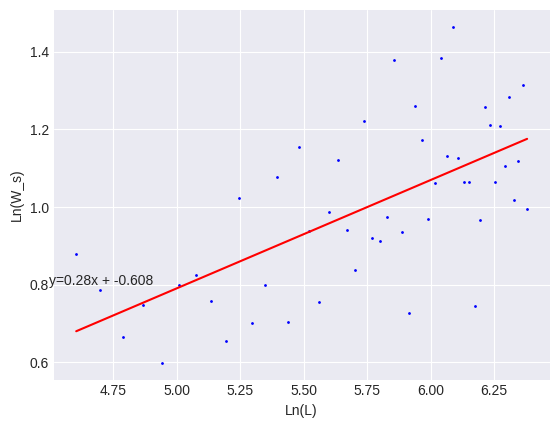

In [ ]:
#now I calculated W_s for each L so i will plot Log(W_s) versus Log(t)

model=LinearRegression()
model.fit(np.log(L).reshape((-1,1)),np.log(w_s))
predict=model.predict(np.log(L).reshape((-1,1)))
alpha=model.coef_[0]
z=alpha/beta_avg

plt.scatter(x=np.log(L),y=np.log(w_s),color='b',s=1,alpha=1)
plt.plot(np.log(L),predict,color='r')
plt.text(x=4.5,y=0.8,s=f'y={round(model.coef_[0],3)}x + {round(model.intercept_,3)}')
plt.xlabel('Ln(L)')
plt.ylabel('Ln(W_s)')
plt.show()

In [ ]:
print(alpha)
print(z)

0.27958509435454443
1.1879466249753257


# **3.Side-Sticking Model**

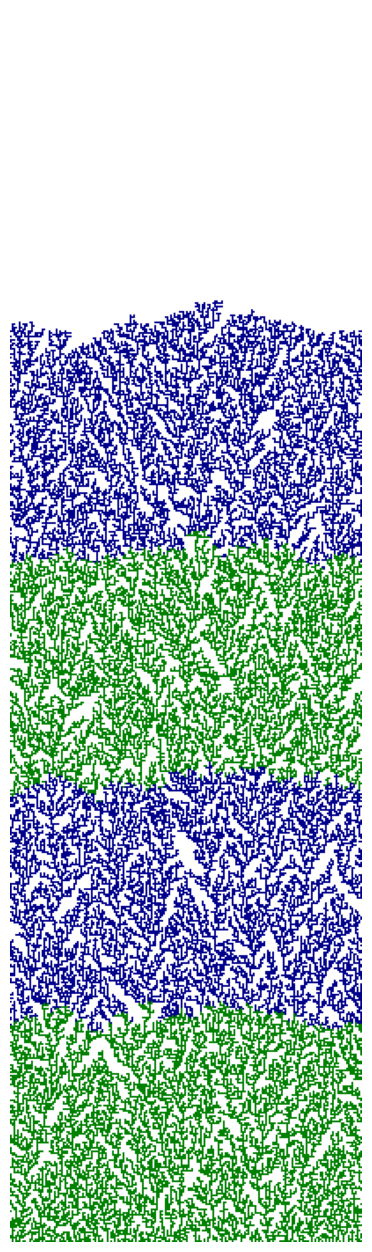

In [60]:
def WhereToFill(mat,h,i):
  left=h[i-1] if i>0 else h[-1]
  right=h[i+1] if i<(len(h)-1) else h[0]
  arr=np.r_[left,h[i],right]
  if arr[1]==arr.max():
    return mat.shape[0]-1-h[i]
  else:
    return mat.shape[0]-arr.max()
#i generate the result in the report for matrix with shape (250,200) and step=20000,we can go forward and use more particles
step=50000
mat=np.zeros(shape=(700,200),dtype=np.uint16)
h=np.zeros(shape=200,dtype=np.uint32)
r=np.random.randint(0,200,size=step)
w=np.zeros(shape=step,dtype=np.float16)
avg=np.zeros(shape=step,dtype=np.float16)

for i in range(step):
  col_indx=r[i]
  row_index=WhereToFill(mat,h,r[i])
  b=i//(step/4)
  if b%2==0:
    mat[row_index,col_indx]=1
  else:
    mat[row_index,col_indx]=2


  h[col_indx]=mat.shape[0]-row_index
  w[i]=np.std(h)
  avg[i]=np.mean(h)

plt.figure(figsize=(8,16))
cmap=mcolors.ListedColormap(['white', 'green', 'darkblue'])
plt.imshow(mat,cmap=cmap)
plt.axis('off')
plt.grid(visible=False)
plt.gca().set_yticks(np.arange(0, mat.shape[0], 50))
plt.gca().set_yticklabels(np.arange(mat.shape[0], 0, -50))
plt.show()

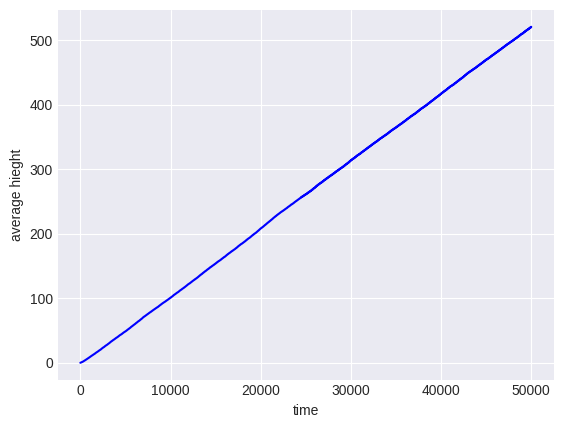

In [62]:
x=np.arange(step)

plt.plot(x,avg,linestyle='-',color='b')
plt.xlabel('time')
plt.ylabel('average hieght')
plt.show()

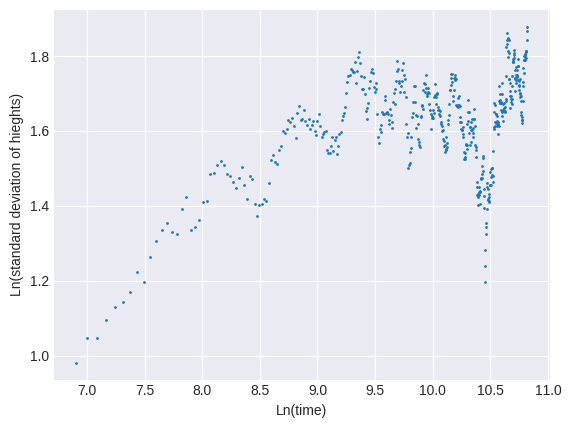

In [63]:
plt.scatter(np.log(x[1000::100]),np.log(w[1000::100]),s=1)
plt.xlabel('Ln(time)')
plt.ylabel('Ln(standard deviation of hieghts)')
plt.show()

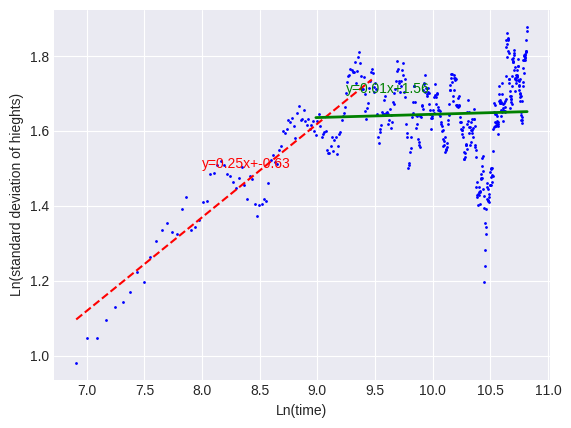

In [64]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(np.log(x[1000:13000]).reshape((-1,1)),np.log(w[1000:13000]))
linear_prediction=model.predict(np.log(x[1000:13000]).reshape(-1,1))
ml=round(model.coef_[0],2)
bl=round(model.intercept_,2)
model.fit(np.log(x[8000:]).reshape((-1,1)),np.log(w[8000:]))
sat_prediction=model.predict(np.log(x[8000:]).reshape(-1,1))
ms=round(model.coef_[0],2)
bs=round(model.intercept_,2)

plt.plot(np.log(x[1000:13000]),linear_prediction,color='r',linestyle='--')
plt.text(x=8,y=1.5,s=f'y={ml}x+{bl}',color='r')
plt.plot(np.log(x[8000:]),sat_prediction,color='g',linestyle='-',linewidth=2)
plt.text(x=9.25,y=1.7,s=f'y={ms}x+{bs}',color='g')
plt.scatter(np.log(x[1000::100]),np.log(w[1000::100]),c='b',s=1)
plt.xlabel('Ln(time)')
plt.ylabel('Ln(standard deviation of hieghts)')
plt.show()


In [71]:
#now again lets calculate beta for 100 different samples with same size
beta=np.zeros(shape=100,dtype=np.float16)
step=30000#here for calculating beta 30000 particle is enogh its just make code faster and still it reaches saturation point at between 10k to 15k
x=np.arange(step)
for k in range(100):

  mat=np.zeros(shape=(500,200),dtype=np.uint16)
  h=np.zeros(shape=200,dtype=np.uint32)
  r=np.random.randint(0,200,size=step)
  w=np.zeros(shape=step,dtype=np.float16)
  avg=np.zeros(shape=step,dtype=np.float16)

  for i in range(step):
    col_indx=r[i]
    row_index=WhereToFill(mat,h,r[i])
    b=i//(step/4)
    if b%2==0:
      mat[row_index,col_indx]=1
    else:
      mat[row_index,col_indx]=2

    h[col_indx]=mat.shape[0]-row_index
    w[i]=np.std(h)
    avg[i]=np.mean(h)

  model=LinearRegression()
  model.fit(np.log(x[200:10000]).reshape((-1,1)),np.log(w[200:10000]))
  beta[k]=model.coef_[0]



In [72]:
beta_avg=beta.mean()
error=beta.std()
print(error)
print(beta_avg)

0.0601
0.301


In [83]:
#again for calculating alpha we need samples with diffrent sizes so i create 50 smaples with L between 50  and 550
L=np.arange(50,550,10)
w_s=np.zeros(shape=len(L),dtype=np.float16)
for idx,k in enumerate(L):
  step=int(k*(k)*0.85)
  mat=np.zeros(shape=(10*k,k))
  h=np.zeros(shape=k,dtype=np.uint32)
  w=np.zeros(shape=step,dtype=np.float16)
  r=np.random.randint(0,k,size=step)

  for i in range(step):
    col_index=r[i]
    row_index=WhereToFill(mat,h,r[i])
    mat[row_index,col_index]=1
    h[col_index]=mat.shape[0]-row_index
    w[i]=np.std(h)

  w_s[idx]=np.mean(w[(step-k*15):])



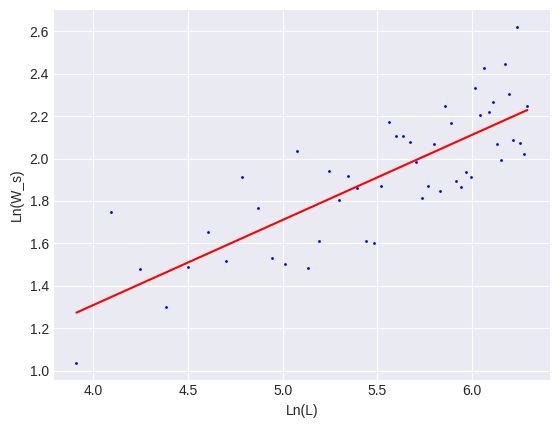

In [84]:
#now lets plot log(w_s) versus log(L)
model=LinearRegression()
model.fit(np.log(L).reshape((-1,1)),np.log(w_s))
predict=model.predict(np.log(L).reshape((-1,1)))
alpha=model.coef_[0]

plt.plot(np.log(L),predict,color='r',linestyle='-')
plt.scatter(np.log(L),np.log(w_s),color='b',s=1)
plt.xlabel('Ln(L)')
plt.ylabel('Ln(W_s)')
plt.show()


In [81]:
z=alpha/beta_avg
print(z)
print(alpha)

1.157419174910391
0.3484125592442657


# **4.Correlation lenght in side sticking Model**

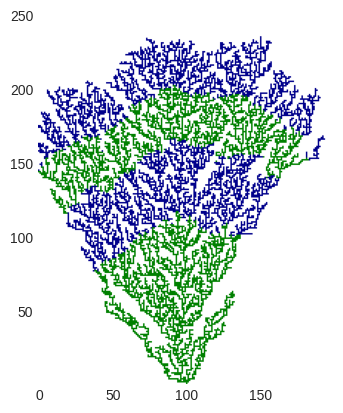

In [30]:
#for creating this model process is as before i just add a mechanism so in each step it removes every particles that are landing other than that one point in the middle,its fairly easy!
def WhereToFill(mat,h,i):
  left=h[i-1] if i>0 else h[-1]
  right=h[i+1] if i<(len(h)-1) else h[0]
  arr=np.r_[left,h[i],right]
  if arr[1]==arr.max():
    return mat.shape[0]-1-h[i]
  else:
    return mat.shape[0]-arr.max()

def RandomRange(h):#with this function i generate random particles in where they dont get deleted from the matrix,it doesnt change probablity distribution of the question!
  h= (h>0)
  left_boundry=np.argmax(h)-1 if np.argmax(h)>0 else 0
  right_boundry=len(h)-1-np.argmax(np.flip(h))+1 if np.argmax(np.flip(h))>0 else len(h)-1
  return np.random.randint(left_boundry,right_boundry+1)


#i generate the result in the report for matrix with shape (250,200) and step=20000,we can go forward and use more particles
step=12000
mat=np.zeros(shape=(250,200),dtype=np.uint16)
h=np.zeros(shape=200,dtype=np.uint32)
w=np.zeros(shape=step,dtype=np.float16)
transverse_length=np.zeros(shape=step,dtype=np.float16)#for calculating transverse length at each step
mat[-2:,100]=1#i add the middle point we could wait and in the loop it will apear but for faster process i will do this.
h[len(h)//2]=2
for i in range(step):
  col_index=RandomRange(h)
  row_index=WhereToFill(mat,h,col_index)
  b=i//(step/4)

  if b%2==0:
    mat[row_index,col_index]=1
  else:
    mat[row_index,col_index]=2

  mat[-1,0:100]=0
  mat[-1,101:]=0


  h[col_index]=mat.shape[0]-np.argmax(mat[:,col_index]>0)
  w[i]=np.std(h)
  transverse_length[i]=np.sum(h>0)


cmap=mcolors.ListedColormap(['white', 'green', 'darkblue'])
plt.imshow(mat,cmap=cmap)
plt.grid(visible=False)
plt.gca().set_yticks(np.arange(0, mat.shape[0], 50))
plt.gca().set_yticklabels(np.arange(mat.shape[0], 0, -50))
plt.show()


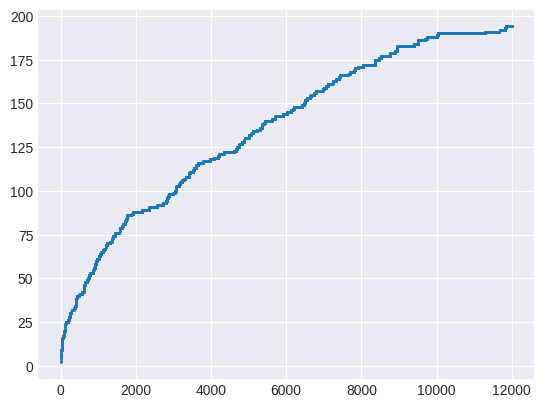

In [33]:
#we have calculated the transverse length at each step so lets plot it!
x=np.arange(1,step+1)
plt.scatter(x,transverse_length,s=1)
plt.xlabel('time')
plt.ylabel('transverse length')
plt.show()

In [40]:
#lets do the proccess for a sample with bigger size
step=1200000
mat=np.zeros(shape=(2500,2500),dtype=np.uint16)
h=np.zeros(shape=mat.shape[1],dtype=np.uint32)
w=np.zeros(shape=step,dtype=np.float16)
transverse_length=np.zeros(shape=step,dtype=np.float16)#for calculating transverse length at each step
mat[-2:,len(h)//2]=1#i add the middle point we could wait and in the loop it will apear but for faster process i will do this.
h[len(h)//2]=2
for i in range(step):
  col_index=RandomRange(h)
  row_index=WhereToFill(mat,h,col_index)
  b=i//(step/4)
  mat[row_index,col_index]=1

  mat[-1,0:len(h)//2]=0
  mat[-1,len(h)//2+1:]=0


  h[col_index]=mat.shape[0]-np.argmax(mat[:,col_index]>0)
  w[i]=np.std(h)
  transverse_length[i]=np.sum(h>0)



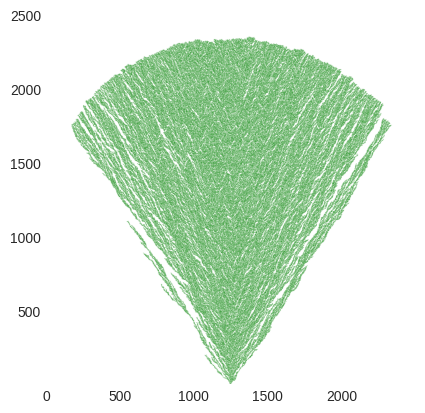

In [41]:
cmap=mcolors.ListedColormap(['white', 'green'])
plt.imshow(mat,cmap=cmap)
plt.grid(visible=False)
plt.gca().set_yticks(np.arange(0, mat.shape[0], 500))
plt.gca().set_yticklabels(np.arange(mat.shape[0], 0, -500))
plt.show()

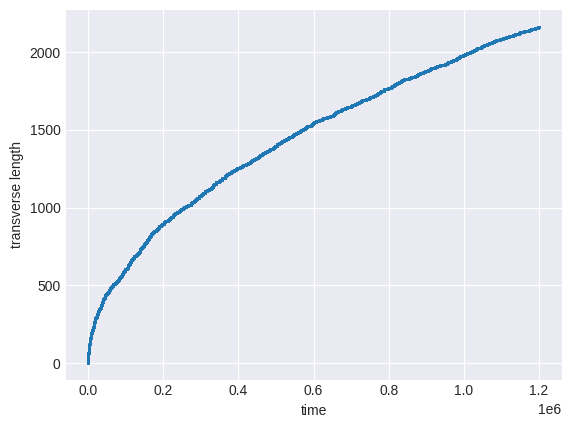

In [42]:
x=np.arange(1,step+1)
plt.scatter(x,transverse_length,s=1)
plt.xlabel('time')
plt.ylabel('transverse length')
plt.show()

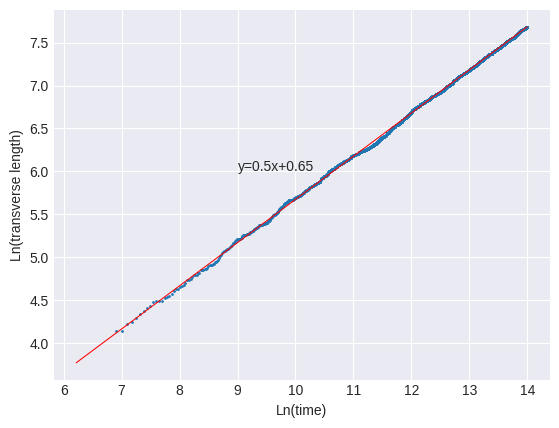

In [50]:
#for calculating growth rate lets plot log log plot
model=LinearRegression()
model.fit(np.log(x[500:]).reshape((-1,1)),np.log(transverse_length[500:]))
predict=model.predict(np.log(x[500:]).reshape((-1,1)))
plt.plot(np.log(x[500:]),predict,color='r',linewidth=0.75)
plt.text(x=9,y=6,s=f'y={round(model.coef_[0],2)}x+{round(model.intercept_,2)}')
growth_rate=model.coef_[0]
plt.scatter(np.log(x[1000::100]),np.log(transverse_length[1000::100]),s=1)
plt.xlabel('Ln(time)')
plt.ylabel('Ln(transverse length)')
plt.show()

In [55]:
cumsum_transverse_length = np.cumsum(transverse_length)
avg_transverse_length = cumsum_transverse_length / (np.arange(1, len(transverse_length) + 1))
model=LinearRegression()
model.fit(np.log(x[100000:]).reshape((-1,1)),np.log(avg_transverse_length[100000:]))
predict=model.predict(np.log(x[1000:]).reshape((-1,1)))
plt.plot(np.log(x[1000:]),predict,color='r',linewidth=0.75)
plt.text(x=9,y=6,s=f'y={round(model.coef_[0],2)}x+{round(model.intercept_,2)}')
plt.scatter(np.log(x[1000:]),np.log(avg_transverse_length[1000:]),color='b')
plt.xlabel('time')
plt.ylabel('average transverse length')
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


ValueError: Input y contains infinity or a value too large for dtype('float64').

# **5.Needle Growth**

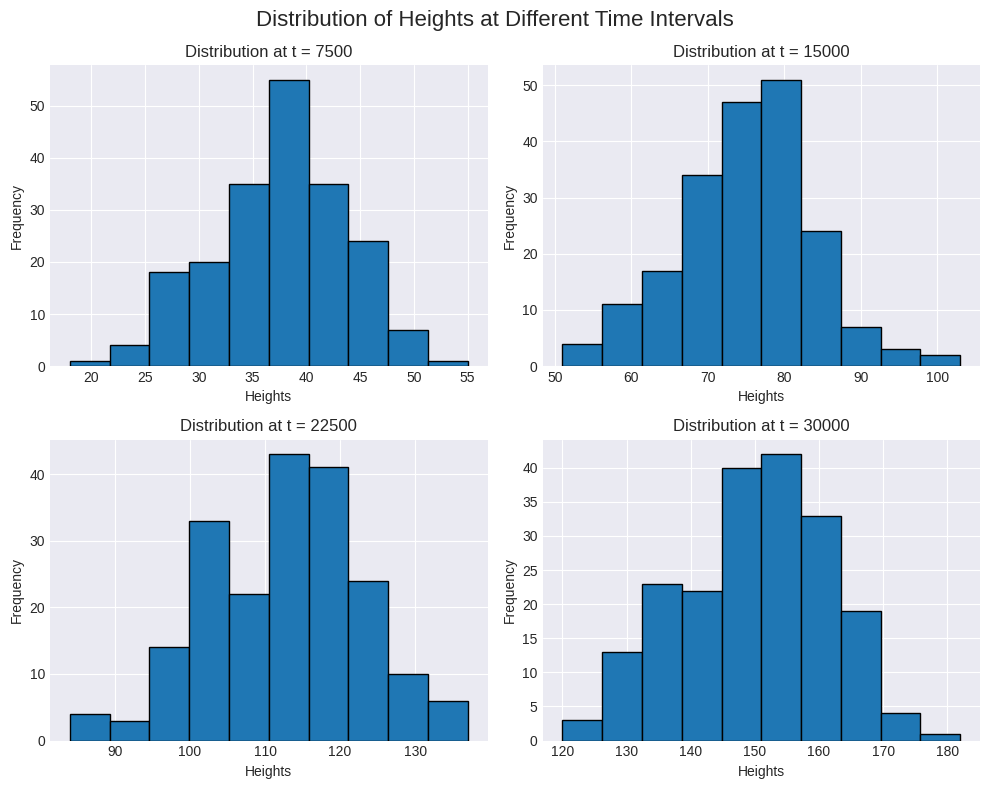

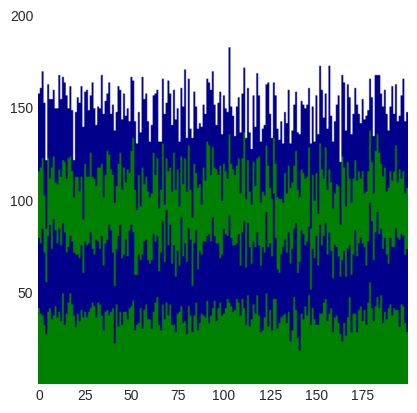

In [13]:

def WhereItHit(i,h,theta,mat):
  loc=[[mat.shape[1]-k-1,(i+k*int(np.tan(theta)))%mat.shape[1]] for k in range(mat.shape[0])]#we track the particle
  loc=np.array(loc)
  for k in range(mat.shape[0]):
    if loc[k,0]<=h[loc[k,1]]:#were it hits one of the columns
      return loc[k,1]

step=30000
mat=np.zeros(shape=(200,200),dtype=np.uint8)
h=np.zeros(shape=mat.shape[1],dtype=np.uint32)
w=np.zeros(shape=step,dtype=np.float16)
r=np.random.randint(0,mat.shape[1],size=step)
heights_at_intervals = []

for i in range(step):
  col_index=WhereItHit(r[i],h,np.deg2rad(45),mat)#i used theta=45 for simulation
  h[col_index]+=1
  row_index=mat.shape[0]-h[col_index]
  w[i]=np.std(h)
  b=i//(step/4)
  if b%2==0:
    mat[row_index,col_index]=1
  else:
    mat[row_index,col_index]=2
  if i+1 in range(step//4,step+step//4,step//4):
        heights_at_intervals.append(h.copy())


fig, axs = plt.subplots(2,2, figsize=(10, 8))
for idx, (interval, heights) in enumerate(zip(range(step//4, step+1, step//4), heights_at_intervals)):
    row = idx//2
    col = idx%2
    axs[row,col].hist(heights, bins=10, edgecolor='black')
    axs[row,col].set_title(f'Distribution at t = {interval}')
    axs[row,col].set_xlabel('Heights')
    axs[row,col].set_ylabel('Frequency')

fig.suptitle('Distribution of Heights at Different Time Intervals',fontsize=16)
plt.tight_layout()
plt.show()


cmap=mcolors.ListedColormap(['white', 'green', 'darkblue'])
plt.imshow(mat,cmap=cmap)
plt.grid(visible=False)
plt.gca().set_yticks(np.arange(0, mat.shape[0], 50))
plt.gca().set_yticklabels(np.arange(mat.shape[0], 0, -50))
plt.show()
